In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv('Salary_Data.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


YearsExperience    0
Salary             0
dtype: int64

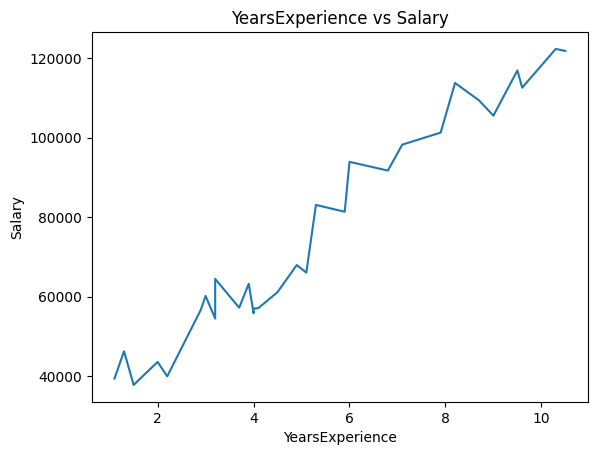

In [76]:
plt.plot(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()

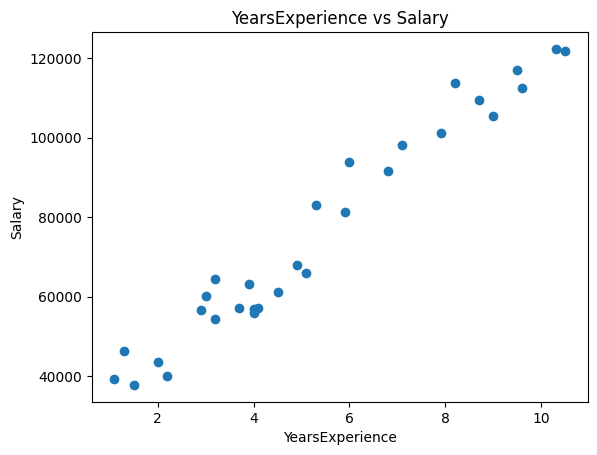

In [77]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.show()

In [78]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train_tensor=Variable(torch.Tensor(X_train.values).float())
y_train_tensor=Variable(torch.Tensor(y_train.values).float())
X_test_tensor=Variable(torch.Tensor(X_test.values).float())
y_test_tensor=Variable(torch.Tensor(y_test.values).float())

In [80]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_size,1)

    def forward(self,x):
        return self.linear(x)


In [81]:
input_size=X.shape[1]
model=LinearRegressionModel(input_size)

criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

epochs=1000
train_losses=[]

In [82]:
for epoch in range(epochs):
    outputs=model(X_train_tensor)
    loss=criterion(outputs,y_train_tensor.view(-1,1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

In [83]:
model.eval()
test_losses = []

for epoch in range(epochs):
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor.view(-1, 1))
        test_losses.append(test_loss.item())



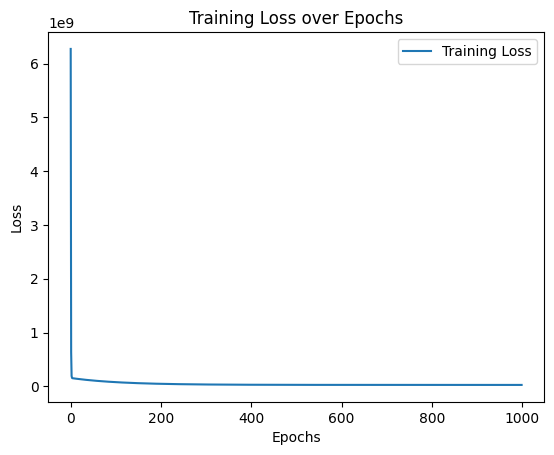

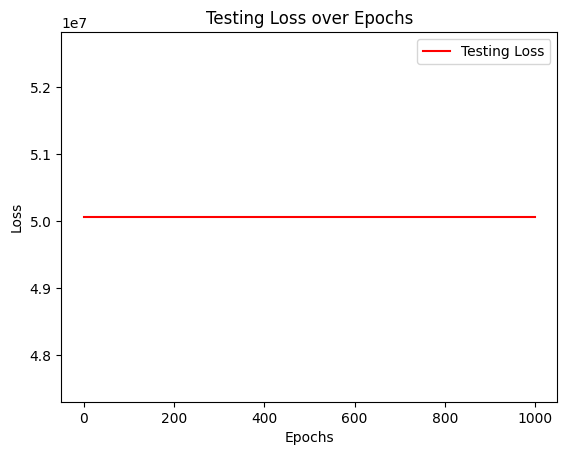

In [84]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


plt.plot(test_losses, label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing Loss over Epochs')
plt.legend()
plt.show()


In [85]:
train_rmse=np.sqrt(train_losses[-1])
test_rmse=np.sqrt(mean_squared_error(y_test.values, y_pred.numpy().flatten()))

print("\nActual values : \n",y_test)
print("\nPredicted values : \n",y_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')


Actual values : 
 27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

Predicted values : 
 tensor([[115887.4531],
        [ 71435.5391],
        [102646.4531],
        [ 75218.6875],
        [ 55357.1953],
        [ 60086.1172]])
Training RMSE: 5207.185228124692
Testing RMSE: 7075.641656424396
